In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

Research Questions
The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

DATA COLLECTION AND METHODOLOGY
Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

DATASET
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

===================To boost learning, try to create an end-to-end project using the dataset.==================================

In [2]:
import zipfile
with zipfile.ZipFile('Dataset.zip' ,'r') as zip_ref:
    zip_ref.extractall('')

In [3]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'business.csv',
 'Clean_Dataset.csv',
 'Dataset.zip',
 'economy.csv',
 'flight.ipynb']

In [4]:
dfs = [pd.read_csv(filename) for filename in ['business.csv', 'Clean_Dataset.csv','economy.csv',]]
print(f'Shape of training data is {dfs[0].shape}')
print(f'Shape of testing data is {dfs[1].shape}')
print(f'Shape of testing data is {dfs[2].shape}')

df = dfs[1]
df = df.drop('Unnamed: 0', axis = 1)

Shape of training data is (93487, 11)
Shape of testing data is (300153, 12)
Shape of testing data is (206774, 11)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols

Index(['duration', 'days_left', 'price'], dtype='object')

/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

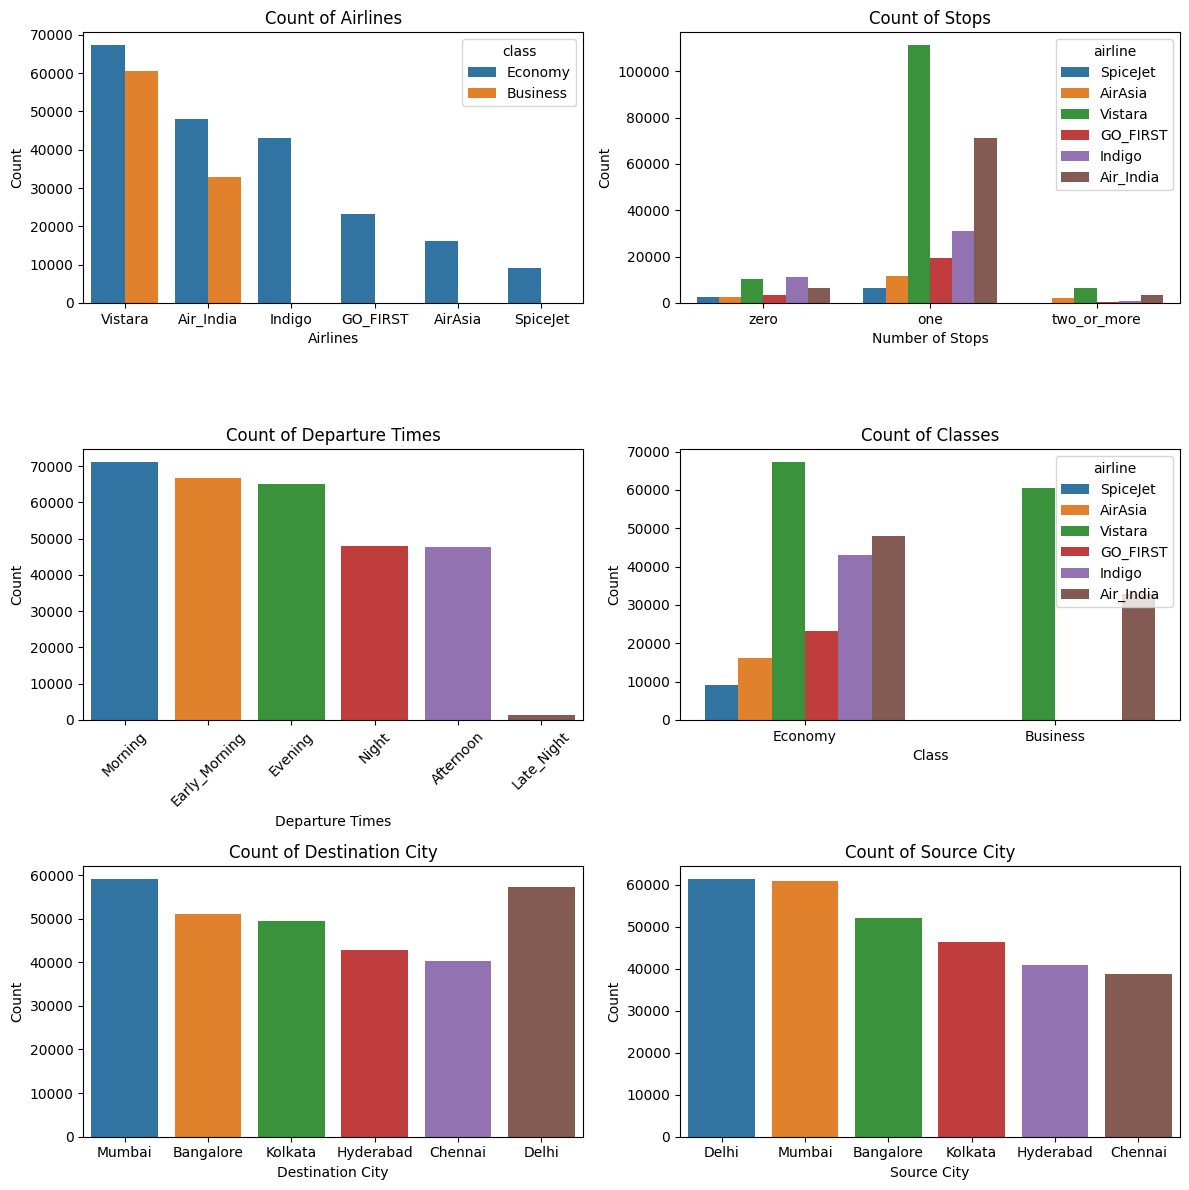

In [7]:
fig, axes = plt.subplots(3, 2, figsize = (12,12))

color_palette = sns.color_palette("Set2")
sns.countplot(ax=axes[0,0] ,x='airline', data=df, order=df.airline.value_counts().index, hue='class')
axes[0, 0].set_title('Count of Airlines')
axes[0, 0].set_xlabel('Airlines')
axes[0, 0].set_ylabel('Count')

sns.countplot(ax=axes[0,1], x='stops', data=df, hue='airline')
axes[0, 1].set_title('Count of Stops')
axes[0, 1].set_xlabel('Number of Stops')
axes[0, 1].set_ylabel('Count')

sns.countplot(ax=axes[1,0], x='departure_time', data=df, order=df.departure_time.value_counts().index)
axes[1, 0].set_title('Count of Departure Times')
axes[1, 0].set_xlabel('Departure Times')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)  

sns.countplot(ax=axes[1,1], x='class', data=df, hue='airline')
axes[1, 1].set_title('Count of Classes')
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('Count')

sns.countplot(ax=axes[2,1], x='source_city', data=df)
axes[2, 1].set_title('Count of Source City')
axes[2, 1].set_xlabel('Source City')
axes[2, 1].set_ylabel('Count')

sns.countplot(ax=axes[2,0], x='destination_city', data=df)
axes[2, 0].set_title('Count of Destination City')
axes[2, 0].set_xlabel('Destination City')
axes[2, 0].set_ylabel('Count')

plt.tight_layout()


/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

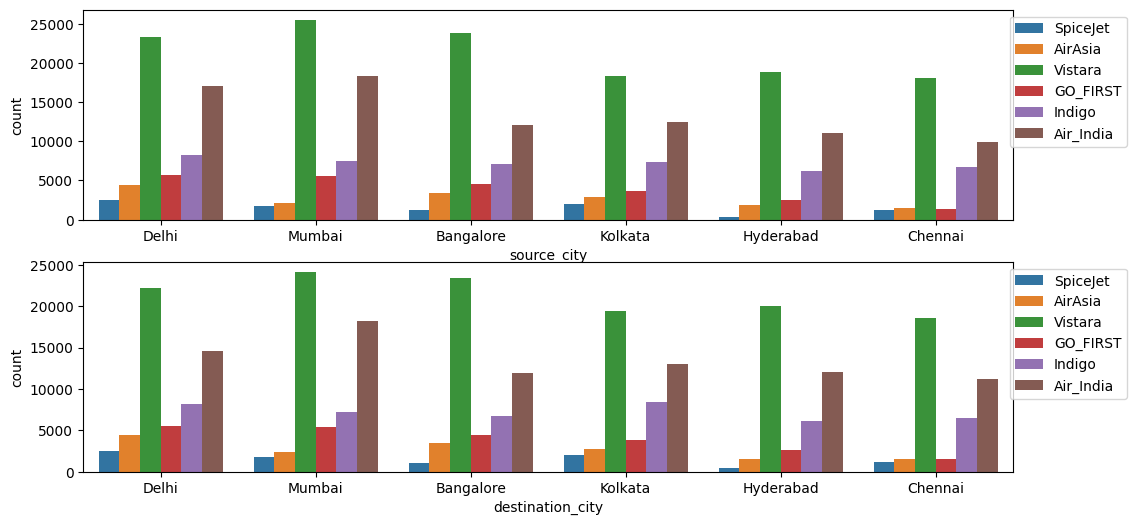

In [8]:
plt.figure(figsize=(12,6))
cities = ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai']


plt.subplot(2,1,1)
sns.countplot(x='source_city', data=df, order=cities, hue='airline')
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))  


plt.subplot(2,1,2)
sns.countplot(x='destination_city', data=df, order=cities, hue='airline')
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))  


In [9]:
df.stops = df.stops.map({'zero':0, 'one':1, 'two_or_more':2})

/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


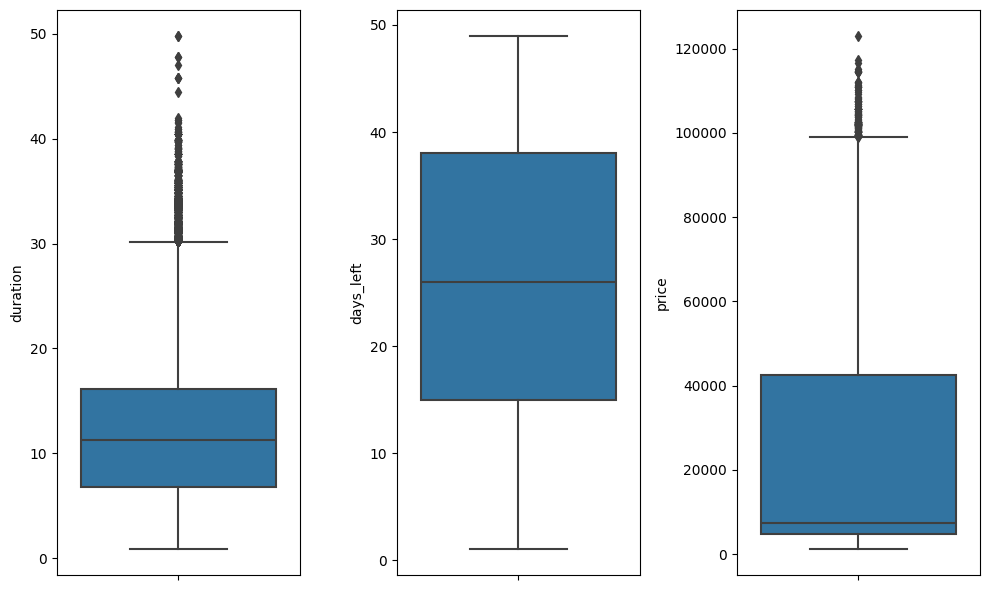

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(y='duration', data=df)

plt.subplot(1,3,2)
sns.boxplot(y='days_left', data=df)

plt.subplot(1,3,3)
sns.boxplot(y='price', data=df)

plt.tight_layout()

In [11]:
df_daysleft_price=df.groupby('days_left')['price'].mean().reset_index().sort_values(by='days_left', ascending=True)
df_daysleft_price=df_daysleft_price[(df_daysleft_price['days_left'] % 5 ==0) | (df_daysleft_price['days_left']==1) | (df_daysleft_price['days_left']==49)  ].reset_index(drop=True)


/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

<Axes: xlabel='destination_city', ylabel='price'>

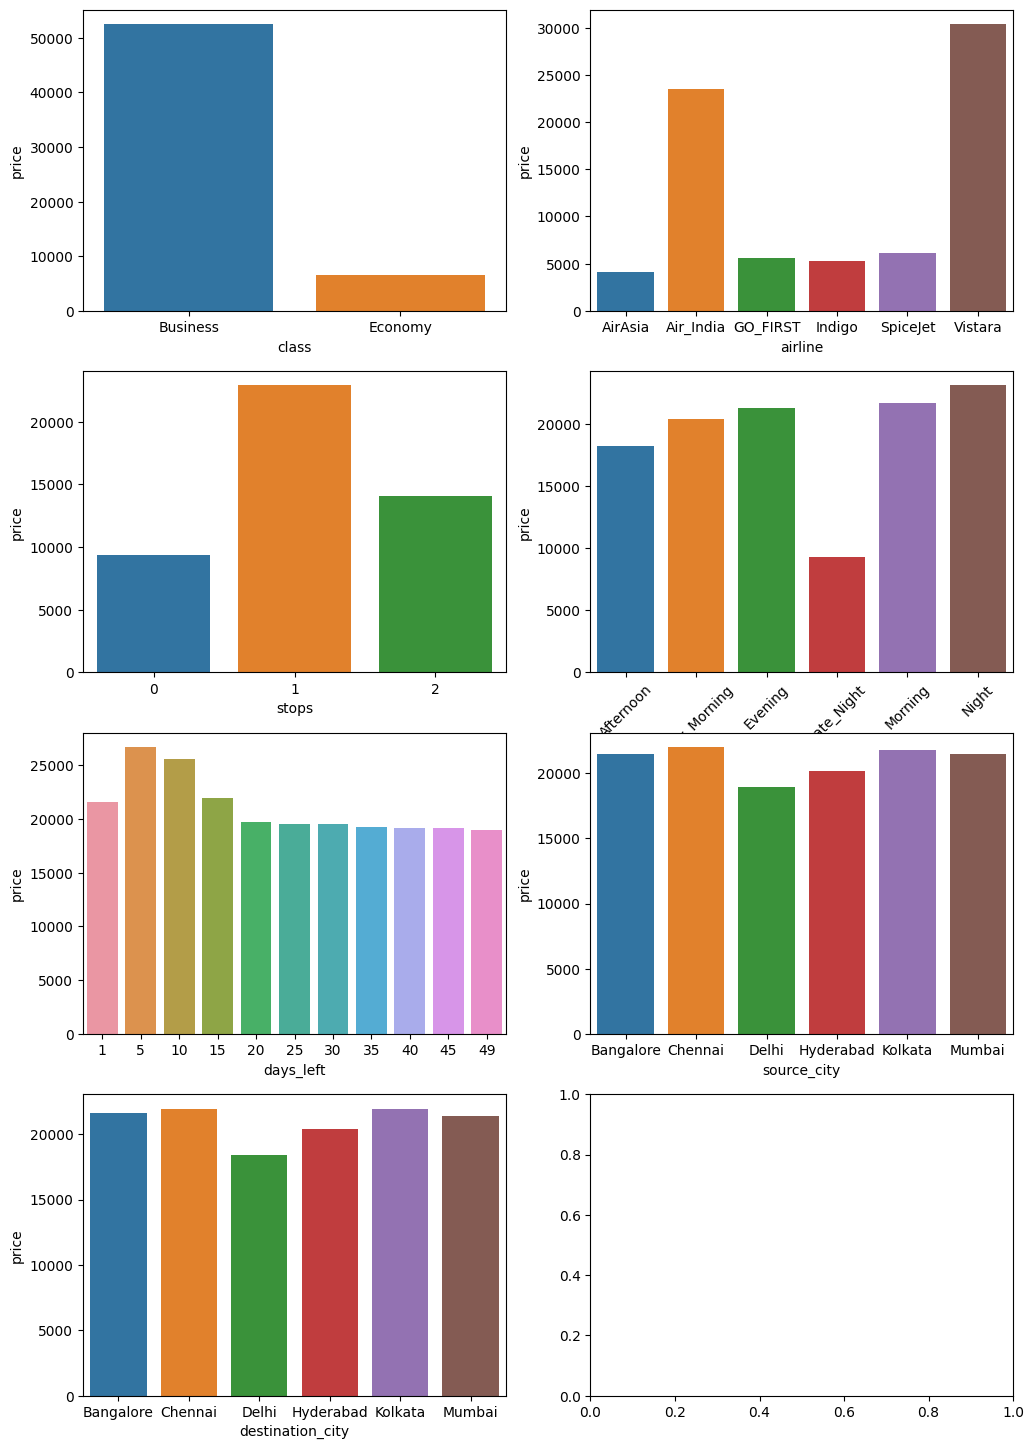

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(12, 18))
sns.barplot(ax=axes[0,0], x='class', y='price', data=df.groupby('class')['price'].mean().reset_index() )


sns.barplot(ax=axes[0,1], x='airline', y='price', data=df.groupby('airline')['price'].mean().reset_index())


sns.barplot(ax=axes[1,0], x='stops', y='price', data=df.groupby('stops')['price'].mean().reset_index())


sns.barplot(ax=axes[1,1], x='departure_time', y='price', data=df.groupby('departure_time')['price'].mean().reset_index())
axes[1, 1].tick_params(axis='x', rotation=45)  

sns.barplot(ax=axes[2,0], x='days_left', y='price', data=df_daysleft_price)


sns.barplot(ax=axes[2,1], x='source_city', y='price', data=df.groupby('source_city')['price'].mean().reset_index())


sns.barplot(ax=axes[3,0], x='destination_city', y='price', data=df.groupby('destination_city')['price'].mean().reset_index())




/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

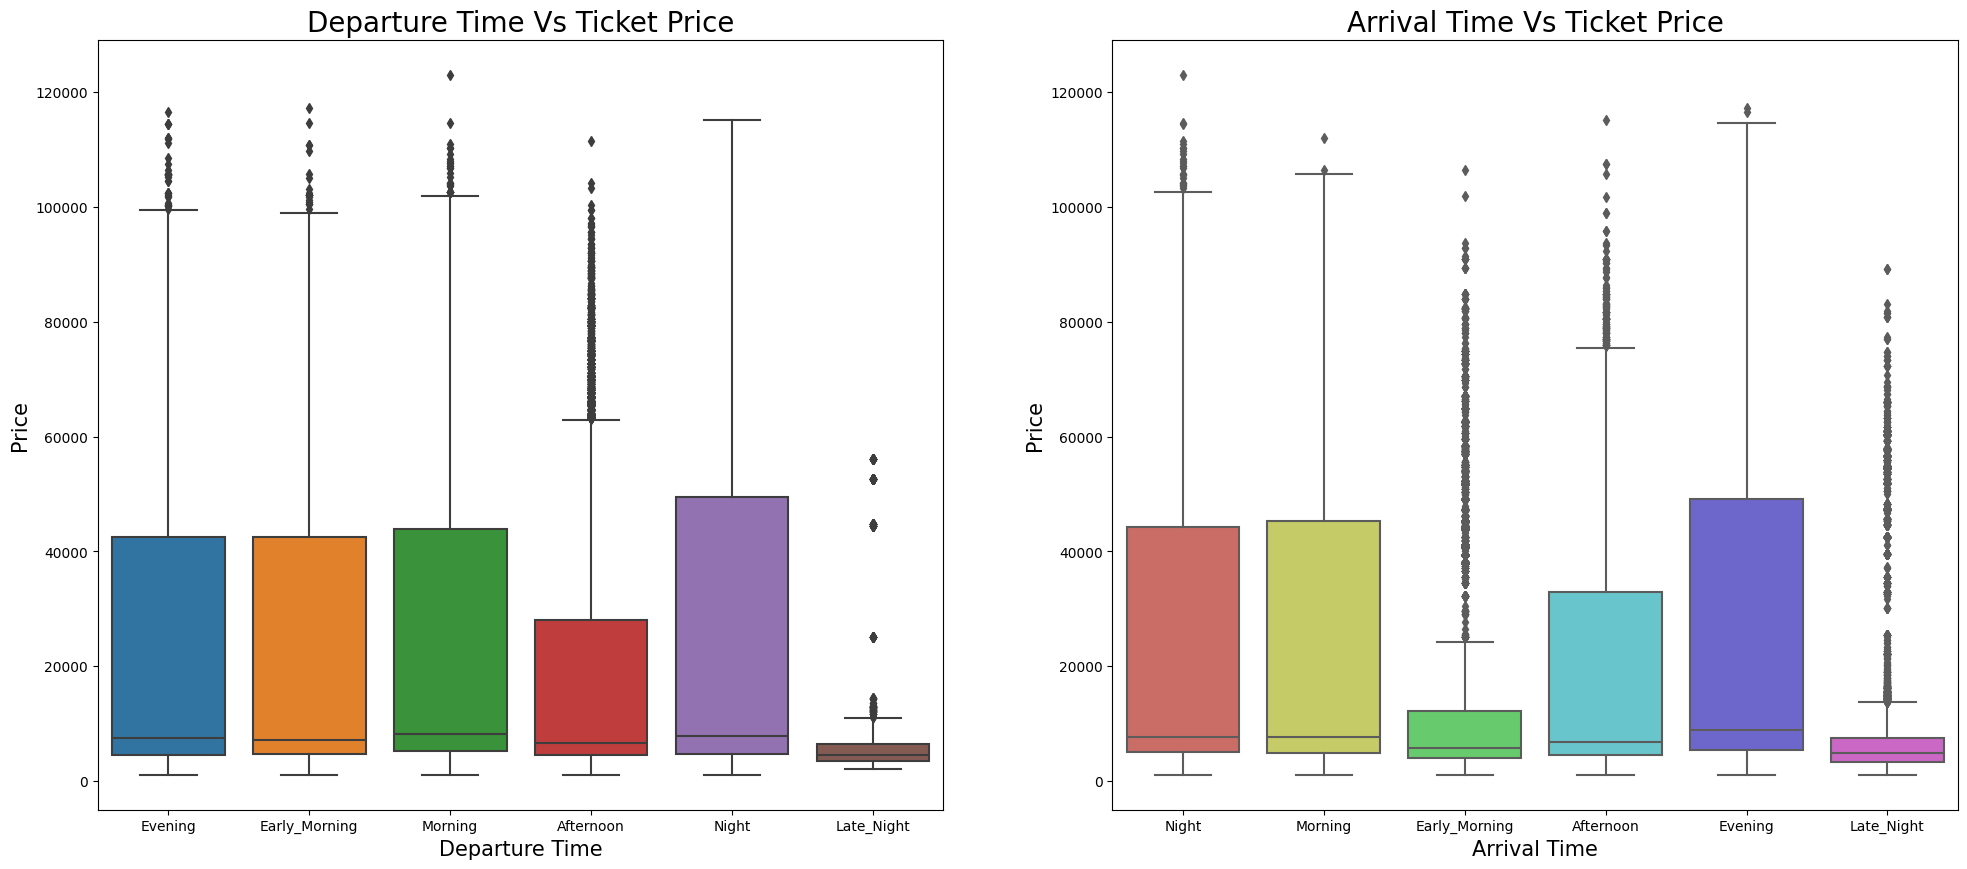

In [13]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


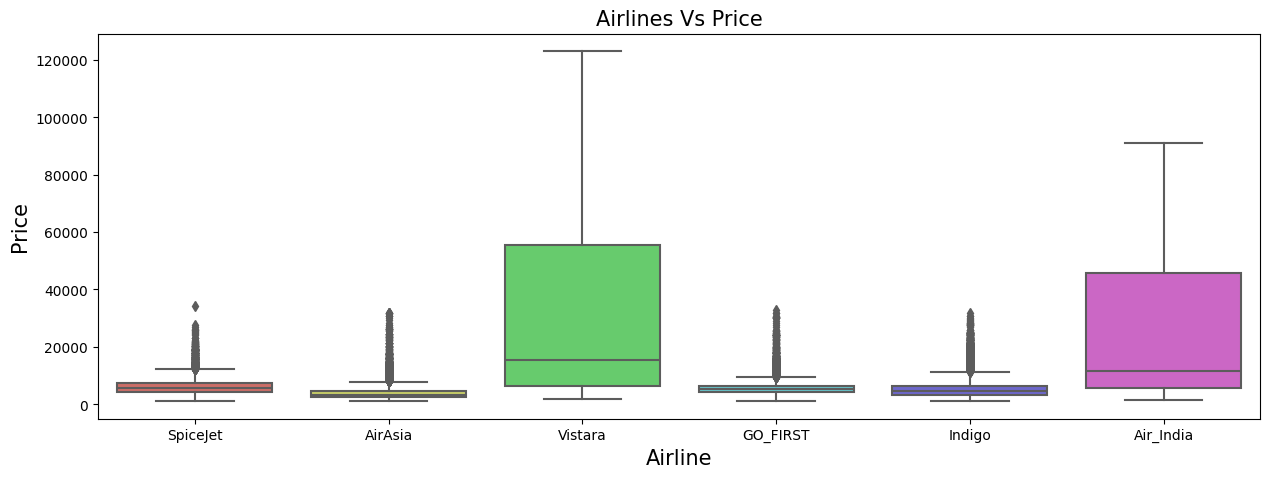

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [15]:
df_2 = df.copy()

In [16]:
df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 25.2+ MB


In [18]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [19]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [20]:
dummy = ['airline', 'source_city', 'departure_time','arrival_time', 'destination_city']
dummies = pd.get_dummies(df[dummy], drop_first=True)
df=pd.concat([df,dummies],axis=1)
df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)

In [21]:

X = df.drop('price', axis = 1)
y = df['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                  train_size=0.70)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,
                                                    test_size=0.15)

In [26]:
X_train.shape, y_train.shape , X_valid.shape, X_test.shape

((210107, 29), (210107,), (76539, 29), (13507, 29))

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['duration', 'days_left']] = scaler.fit_transform(X_train[['duration', 'days_left']])
X_test[['duration', 'days_left']] = scaler.transform(X_test[['duration', 'days_left']])
X_valid[['duration', 'days_left']] = scaler.transform(X_valid[['duration', 'days_left']])

In [25]:
##### QUCIK AND DIRTY MODELS OF LR, DEC TREE, RAND FOREST, XGBOOST

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

In [41]:
def metrics(y_valid, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    return mean_squared_error(y_valid, y_pred), r2_score(y_valid, y_pred), mean_absolute_error(y_valid, y_pred)

metrics(y_valid, y_pred)

(45995632.740208924, 0.9103107935035996, 4509.626834213311)

In [43]:
### DEC TREE
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_2 = dt.predict(X_valid)

In [44]:
metrics(y_valid, y_pred_2)

(12445576.219047008, 0.975731742581269, 1192.1992774925202)

In [45]:
### RAND FOREST
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_3 = rf.predict(X_valid)

In [46]:
metrics(y_valid, y_pred_3)

(7582745.136085174, 0.9852140224233639, 1092.2635654693206)

In [51]:
### XGB
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
y_pred_4 = xg.predict(X_valid)


/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

In [52]:
metrics(y_valid, y_pred_4)

(12407332.826088455, 0.9758063153040221, 2008.3002461754493)